# Project Outline :-

- Face detection involves identifying a person’s face in an image or video. This is done by analyzing the visual input to determine whether a person’s facial features are present.
- We will use Open Cv and more specifically, the library employs a machine learning approach called Haar cascade to identify objects in visual data. 
- The Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces, so no further training is required. We just need to load the classifier from the library and use it to perform face detection on an input image.
- Let us take an image and try to detect the face. Post that we can detect faces on live feed.

In [1]:
import cv2

imagePath = 'Data/image.jpeg'

In [2]:
#read the image
img = cv2.imread(imagePath)

In [3]:
img.shape

(225, 225, 3)

In [4]:
# convert this image to grayscale before performing face detection on it

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
gray_image.shape

(225, 225)

Notice how the image was 3_ dimensional when it is in colour and only 2_D when it is in gray scale

### Load the Classifier

In [6]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

we are using a file called haarcascade_frontalface_default.xml. This classifier is designed specifically for detecting frontal faces in visual input. 

### Perform Face Detection for the image given

In [7]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

### Create a bounding box around the image

In [8]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

### Display the Image

In [9]:
# let us convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 224.5, 224.5, -0.5)

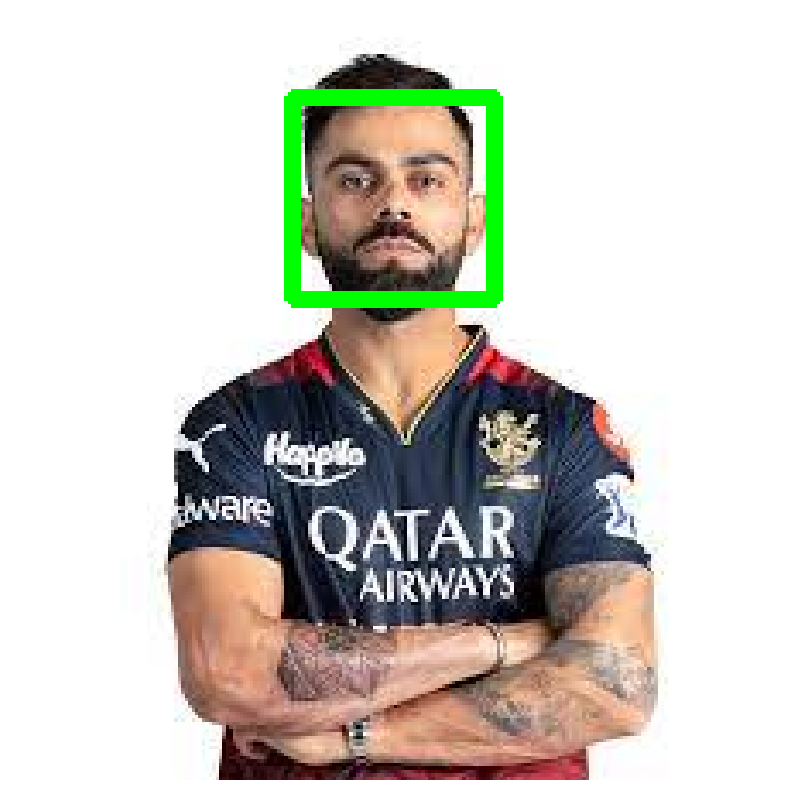

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

The model has successfully detected the human face in this image and created a bounding box around it. 

### Real time face detection using Open CV

#### Access the Webcam

In [12]:
video_capture = cv2.VideoCapture(0)

- Here 0 is given inside because 0 means primary camera.

In [13]:
# let’s create a function to detect faces in the video stream and draw a bounding box around them
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return faces

### Creating Loop for Real Time Face Detection

In [14]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "Face Detection Project by Gagan", video_frame
    )  # display the processed frame in a window named "Face Detection Project by Gagan"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

As soon As we Run this, Another window opens up with from Camera as APP, it will Detect Faces based on facial features. If you need to exit from the app/program or terminate it, you can press q in keyboard on the APP page.